## DSCI - 552 HOMEWORK 4

Name: Varsha Kini$\quad$Github Username: Varsha-Kini$\quad$USC ID: 4013488464  

1.(a) Download the dataset

In [1]:
directory = "../data/AReM"

1.(b) Split the datasets in various folders into train data and test data

In [2]:
# Reference : https://docs.python.org/3/library/os.html
# Reference : https://docs.python.org/3/library/re.html

import os
import re

train = []
test = []
all = 0
for root, subdirectories, files in os.walk(directory):
#     print(root)
#     print(files)
    if root == '../data/AReM':
        continue
    name = os.path.split(root)
    for file in files:
        if file.endswith('.pdf'):
            continue
        i = re.findall(r"[^\W\d_]+|\d+", file)
        j = os.path.join(root, file)
        if name[1] =='bending1' or name[1] == 'bending2':
            if(int(i[1]) < 3):
                test.append(j)
            else:
                train.append(j)
        else:
            if(int(i[1]) < 4):
                test.append(j)
            else:
                train.append(j)       

In [3]:
print("Length of the train set is", len(train))
print("The files included in the train set are: ")
# print(train)

Length of the train set is 69
The files included in the train set are: 


In [4]:
print("Length of the test set is", len(test))
print("The files included in the test set are: ")
# print(test)

Length of the test set is 19
The files included in the test set are: 


1.(c)(i) Research what types of time-domain features are usually used in time series classification and list them

A time series data set is a collection of data that shows measurements of a quantity taken over time. The order of the data points in the dataset has a significant impact on behvaior of the series. A few examples of time series features are: Correlation structure, distribution, entropy, stationarity and scaling properties.

1.(c)(ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [5]:
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# Refrence: https://docs.python.org/3/library/warnings.html
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

import warnings
import pandas as pd
features = pd.DataFrame([])
warnings.filterwarnings('ignore')
time_series1, time_series2, time_series3, time_series4, time_series5, time_series6 = pd.DataFrame([]), pd.DataFrame([]), pd.DataFrame([]), pd.DataFrame([]), pd.DataFrame([]), pd.DataFrame([])
for data in (train + test):
    df = pd.read_csv(data,skiprows=4)
    d1 = df['avg_rss12'].describe()
    d1 = d1.rename(index={'mean': 'mean1', 'std':'std1', 'min': 'min1', '25%': '1st quart1', '50%': 'median1', '75%': '3rd quart1', 'max':'max1'})
    
    d2 = df['var_rss12'].describe()
    d2 = d2.rename(index={'mean': 'mean2', 'std':'std2', 'min': 'min2', '25%': '1st quart2', '50%': 'median2', '75%': '3rd quart2', 'max':'max2'})
    
    d3 = df['avg_rss13'].describe()
    d3 = d3.rename(index={'mean': 'mean3', 'std':'std3', 'min': 'min3', '25%': '1st quart3', '50%': 'median3', '75%': '3rd quart3', 'max':'max3'})
    
    d4 = df['var_rss13'].describe()
    d4 = d4.rename(index={'mean': 'mean4', 'std':'std4', 'min': 'min4', '25%': '1st quart4', '50%': 'median4', '75%': '3rd quart4', 'max':'max4'})
    
    d5 = df['avg_rss23'].describe()
    d5 = d5.rename(index={'mean': 'mean5', 'std':'std5', 'min': 'min5', '25%': '1st quart5', '50%': 'median5', '75%': '3rd quart5', 'max':'max5'})
    
    d6 = df['var_rss23'].describe()
    d6 = d6.rename(index={'mean': 'mean6', 'std':'std6', 'min': 'min6', '25%': '1st quart6', '50%': 'median6', '75%': '3rd quart6', 'max':'max6'})
    
    time_series1 = time_series1.append(d1, ignore_index = True)
    time_series1 = time_series1.drop(['count'], axis=1)
    
    time_series2 = time_series2.append(d2, ignore_index = True)
    time_series2 = time_series2.drop(['count'], axis=1)
    
    time_series3 = time_series3.append(d3, ignore_index = True)
    time_series3 = time_series3.drop(['count'], axis=1)
    
    time_series4 = time_series4.append(d4, ignore_index = True)
    time_series4 = time_series4.drop(['count'], axis=1)
    
    time_series5 = time_series5.append(d5, ignore_index = True)
    time_series5 = time_series5.drop(['count'], axis=1)
    
    time_series6 = time_series6.append(d6, ignore_index = True)
    time_series6 = time_series6.drop(['count'], axis=1)
    
    time_series1 = time_series1[['min1','max1', 'mean1', 'median1', 'std1', '1st quart1', '3rd quart1']]
    time_series2 = time_series2[['min2','max2', 'mean2', 'median2', 'std2', '1st quart2', '3rd quart2']]
    time_series3 = time_series3[['min3','max3', 'mean3', 'median3', 'std3', '1st quart3', '3rd quart3']]
    time_series4 = time_series4[['min4','max4', 'mean4', 'median4', 'std4', '1st quart4', '3rd quart4']]
    time_series5 = time_series5[['min5','max5', 'mean5', 'median5', 'std5', '1st quart5', '3rd quart5']]
    time_series6 = time_series6[['min6','max6', 'mean6', 'median6', 'std6', '1st quart6', '3rd quart6']]
    
print(time_series1)
print(time_series2)
print(time_series3)
print(time_series4)
print(time_series5)
print(time_series6)


     min1   max1      mean1  median1      std1  1st quart1  3rd quart1
0   35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000
1   33.00  47.75  42.179813   43.500  3.670666       39.15     45.0000
2   33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500
3   37.00  48.00  43.454958   43.250  1.386098       42.50     45.0000
4   36.25  48.00  43.969125   44.500  1.618364       43.31     44.6700
..    ...    ...        ...      ...       ...         ...         ...
83  35.50  46.25  43.174938   43.670  1.989052       42.50     44.5000
84  32.75  47.00  42.760563   44.500  3.398919       41.33     45.3725
85  19.33  43.50  34.227771   35.500  4.889576       30.50     37.7500
86  12.50  45.00  33.509729   34.125  4.850923       30.50     36.7500
87  15.00  46.75  34.660583   35.000  5.315110       31.00     38.2500

[88 rows x 7 columns]
    min2   max2     mean2  median2      std2  1st quart2  3rd quart2
0    0.0   1.70  0.426250    0.470  0.338690      0.0000

In [6]:
# Reference: https://pandas.pydata.org/docs/user_guide/merging.html
import pandas as pd
features = pd.concat([time_series1, time_series2, time_series3, time_series4, time_series5, time_series6], axis=1)
features

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.500,0.0,1.79,0.493292,0.430,0.513506,0.000,0.940
1,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.330,0.0,2.18,0.613521,0.500,0.524317,0.000,1.000
2,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.250,0.0,1.79,0.383292,0.430,0.389164,0.000,0.500
3,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.000,0.0,5.26,0.679646,0.500,0.622534,0.430,0.870
4,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.750,0.0,2.96,0.555313,0.490,0.487826,0.000,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,35.50,46.25,43.174938,43.670,1.989052,42.50,44.5000,0.0,2.12,0.506583,...,2.983976,12.7500,16.500,0.0,5.72,0.911979,0.830,0.666161,0.470,1.220
84,32.75,47.00,42.760563,44.500,3.398919,41.33,45.3725,0.0,3.34,0.486167,...,4.296574,13.0000,18.565,0.0,5.73,0.842271,0.710,0.722165,0.430,1.090
85,19.33,43.50,34.227771,35.500,4.889576,30.50,37.7500,0.0,14.50,3.995729,...,3.092094,14.7500,18.670,0.0,9.74,3.394125,3.100,1.792090,2.105,4.425
86,12.50,45.00,33.509729,34.125,4.850923,30.50,36.7500,0.0,13.05,4.450771,...,3.133564,14.6275,18.750,0.0,8.96,3.378479,3.085,1.787360,2.060,4.440


1.(c)(iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Build a 90% bootsrap confidence interval for the standard deviation
of each feature.

In [7]:
# Reference: https://notebook.community/tsarouch/python_minutes/core/Confidence_Prediction_Intervals
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

from sklearn.utils import resample
import numpy as np

feat = [time_series1, time_series2, time_series3, time_series4, time_series5, time_series6]

for m in feat:
    bootstrap_df = pd.DataFrame(columns=['90% Bootstrap Confidence Interval'])
    for c in m.columns:
        alpha, std = 0.90, []
        count = len(m)
        for i in range(1000):
            sam = (resample(m[c], n_samples=count, replace=True))
            std.append(np.std(sam))
        lowerlimit = np.percentile(std, ((1.0-alpha)/2.0) * 100)
        upperlimit = np.percentile(std, (alpha+((1.0-alpha)/2.0)) * 100)
        bootstrap_df.loc[c] = str([lowerlimit, upperlimit])
#     print( bootstrap_df)

1.(c)(iv) Use your judgement to select the three most important time-domain features

I would choose max, mean and standard deviation as the most important time-domain features.

# Time Series Classification Part 2: Binary and Multiclass Classification

2.(a).i Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [8]:
# Reference: https://www.geeksforgeeks.org/python-os-path-split-method/
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.concat.html

m1, m2, m6 = [], [], [] 
m1_df, m2_df, m6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
label = []
time_series_df = pd.DataFrame()
for files in (train):
    name = os.path.split(files)[0]
    file_name = os.path.split(name)
    class_category = ['bending1','bending2']
    if(file_name[1] not in class_category):
        label.append(0)
    else:
        label.append(1)
    final_df = pd.read_csv(files,skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    m1 = final_df['avg_rss12'].describe()
    m1 = m1.rename(index={'mean': 'mean1', 'std':'std1', 'max':'max1'})
    m1 = m1.drop(['count', 'min', '25%', '50%', '75%'])
    m2 = final_df['var_rss12'].describe()
    m2 = m2.rename(index={'mean': 'mean2', 'std':'std2', 'max':'max2'})
    m2 = m2.drop(['count', 'min', '25%', '50%', '75%'])
    m6 = final_df['var_rss23'].describe()
    m6 = m6.rename(index={'mean': 'mean6', 'std':'std6', 'max':'max6'})
    m6 = m6.drop(['count', 'min', '25%', '50%', '75%'])
    
    m1_df = m1_df.append(m1, ignore_index = True)
    m2_df = m2_df.append(m2, ignore_index = True)
    m6_df = m6_df.append(m6, ignore_index = True)
    
label_df = pd.DataFrame()
label_df['Label'] = label

time_series_df = pd.concat([m1_df, m2_df, m6_df, label_df], axis = 1)
print(time_series_df)

        mean1      std1   max1     mean2      std2   max2     mean6      std6  \
0   43.954500  1.558835  47.40  0.426250  0.338690   1.70  0.493292  0.513506   
1   42.179813  3.670666  47.75  0.696042  0.630860   3.00  0.613521  0.524317   
2   41.678063  2.243490  45.75  0.535979  0.405469   2.83  0.383292  0.389164   
3   43.454958  1.386098  48.00  0.378083  0.315566   1.58  0.679646  0.622534   
4   43.969125  1.618364  48.00  0.413125  0.263111   1.50  0.555313  0.487826   
..        ...       ...    ...       ...       ...    ...       ...       ...   
64  34.763333  4.742208  46.25  4.223792  2.278004  12.68  3.288271  1.647528   
65  34.935813  4.645944  51.00  4.115750  2.335243  12.21  3.280021  1.700918   
66  34.333042  4.948770  47.67  4.396958  2.568680  12.48  3.261583  1.617290   
67  34.599875  4.731790  45.75  4.398833  2.538521  15.37  3.289542  1.680170   
68  34.225875  4.441798  43.67  4.354500  2.518991  17.24  3.479542  1.761146   

     max6  Label  
0    1.7

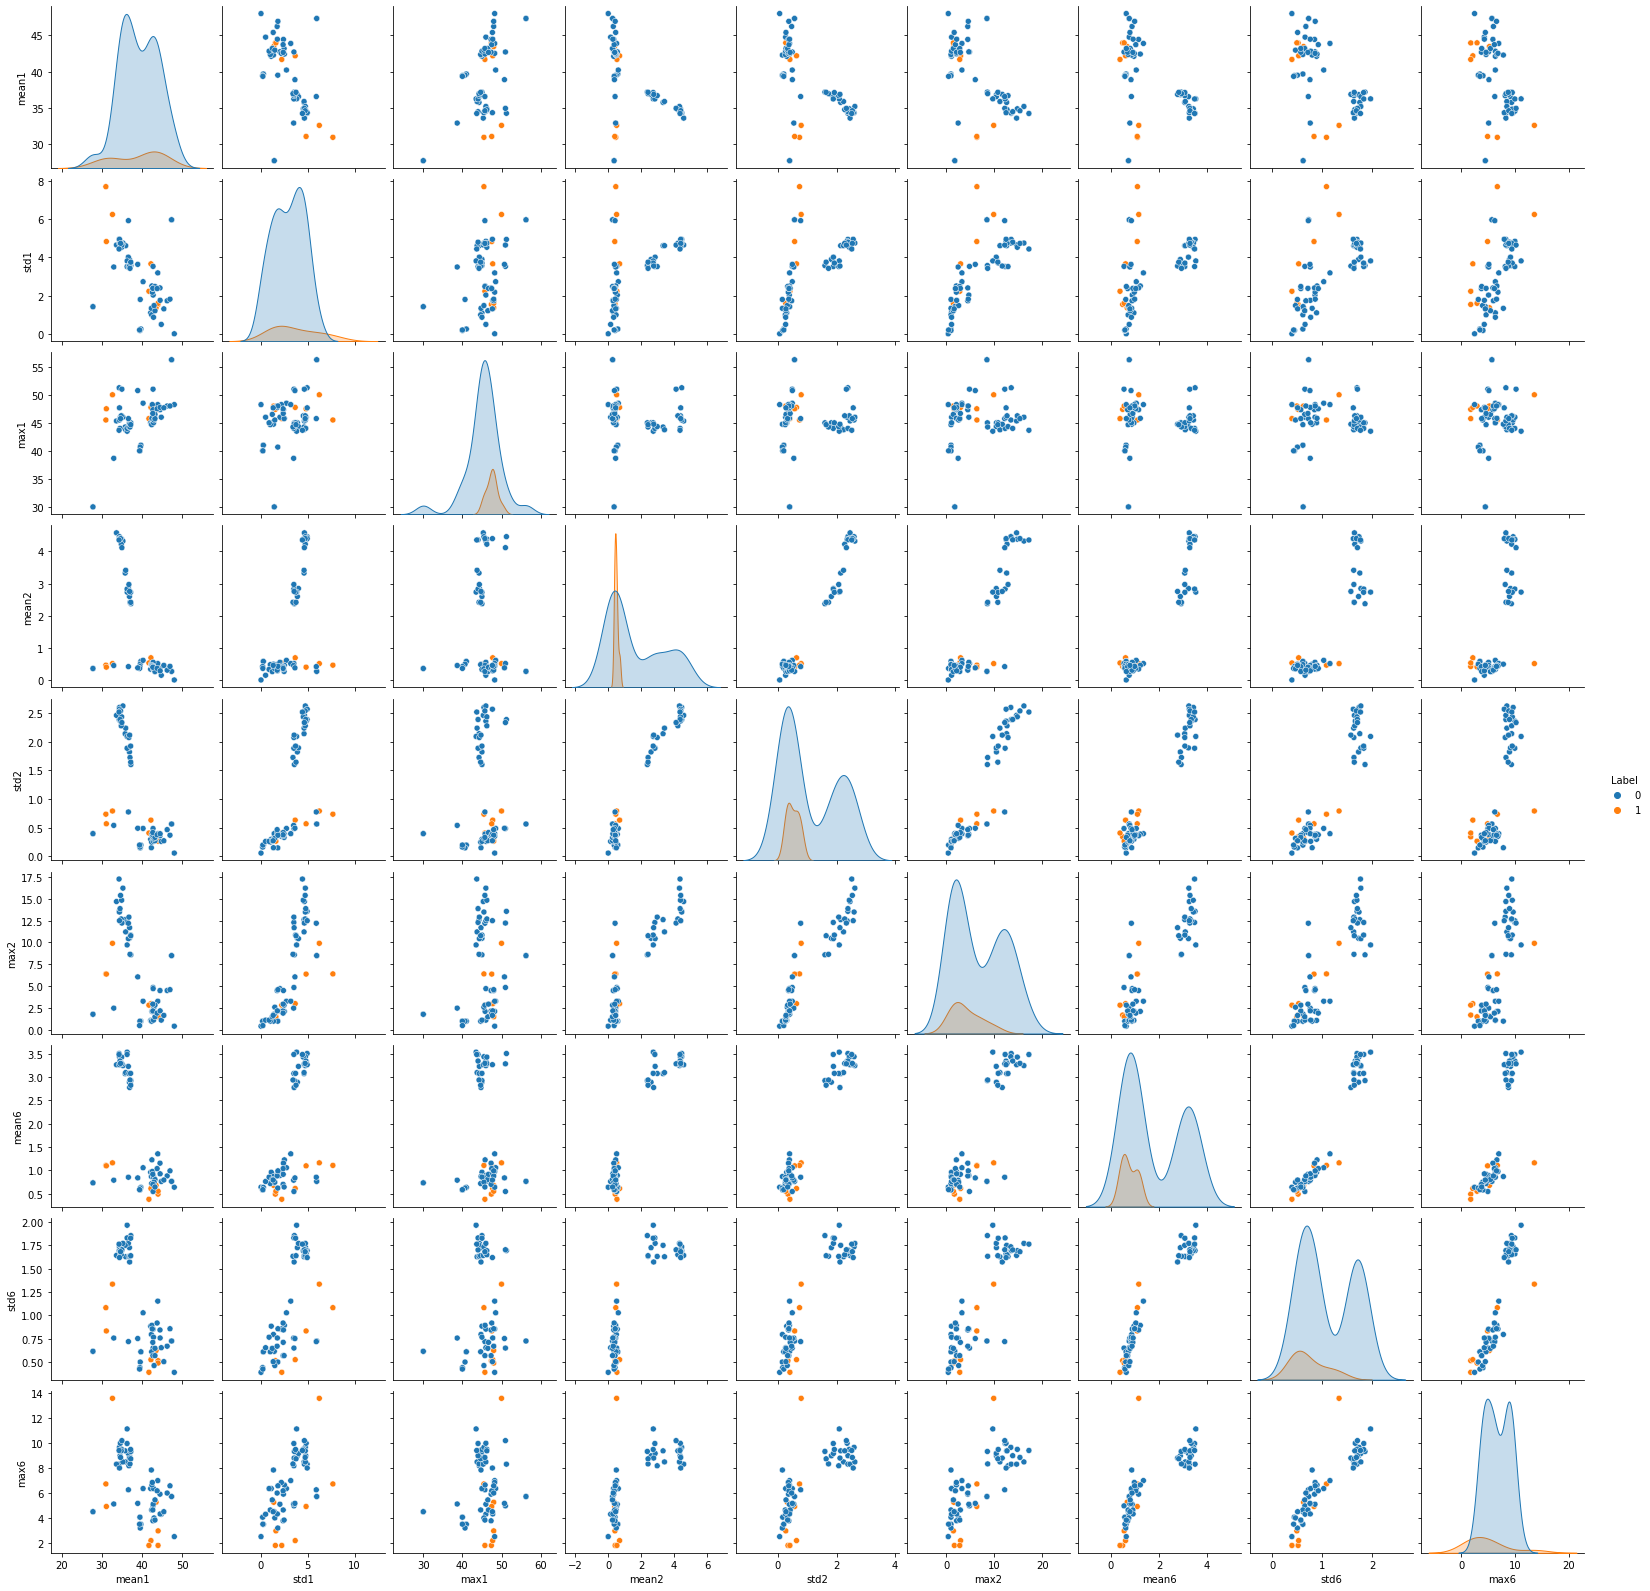

In [9]:
# Reference: https://seaborn.pydata.org/generated/seaborn.pairplot.html

import seaborn as sns
plot = sns.pairplot(time_series_df, hue = 'Label')

2.(a)ii. Break each time series in your training set into two(approximately) equal length time series. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

The number of rows in each of the time-series is 480. To divide the training set into two equal length time-series, we need to consider 480/2 = 240 rows in each of the half from the training set.

In [10]:
m1, m2, m6 = [], [], [] 
m1_df, m2_df, m6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
label = []
for files in train:
    label.append(0)
    final_df = pd.read_csv(files,skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    first_half = final_df.iloc[:240]
    m1 = first_half['avg_rss12'].describe()
    m1 = m1.rename(index={'mean': 'mean1', 'std':'std1', 'max':'max1'})
    m1 = m1.drop(['count', 'min', '25%', '50%', '75%'])
    m2 = first_half['var_rss12'].describe()
    m2 = m2.rename(index={'mean': 'mean2', 'std':'std2', 'max':'max2'})
    m2 = m2.drop(['count', 'min', '25%', '50%', '75%'])
    m6 = first_half['var_rss23'].describe()
    m6 = m6.rename(index={'mean': 'mean6', 'std':'std6', 'max':'max6'})
    m6 = m6.drop(['count', 'min', '25%', '50%', '75%'])
    
    m1_df = m1_df.append(m1, ignore_index = True)
    m2_df = m2_df.append(m2, ignore_index = True)
    m6_df = m6_df.append(m6, ignore_index = True)

label_df = pd.DataFrame()
label_df['Label'] = label

first_half_df = pd.concat([m1_df, m2_df, m6_df, label_df], axis = 1)
print(first_half_df)    

        mean1      std1   max1     mean2      std2   max2     mean6      std6  \
0   44.057167  1.556971  46.50  0.381042  0.329540   1.50  0.598250  0.526656   
1   43.278875  3.473355  47.75  0.673292  0.634285   3.00  0.640958  0.554542   
2   41.621208  3.118644  45.75  0.623083  0.489595   2.83  0.419083  0.411200   
3   44.117042  1.359836  48.00  0.250042  0.314099   1.30  0.815417  0.718016   
4   43.486208  1.281976  45.00  0.378667  0.284434   1.30  0.524875  0.486847   
..        ...       ...    ...       ...       ...    ...       ...       ...   
64  34.966250  4.733014  46.00  4.207958  2.331940  12.68  3.146333  1.638218   
65  34.737042  4.276717  45.67  4.217333  2.337759  12.21  3.334125  1.737573   
66  33.886458  5.143776  45.00  4.332208  2.453111  12.44  3.248417  1.565557   
67  34.836458  4.869092  44.00  4.257750  2.512633  12.38  3.169625  1.647640   
68  34.329333  4.549837  42.75  4.315917  2.470266  14.50  3.381250  1.725690   

    max6  Label  
0   1.79 

In [11]:
m1, m2, m6 = [], [], [] 
m1_df, m2_df, m6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
label = []
for files in train:
    label.append(1)
    final_df = pd.read_csv(files,skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    second_half = final_df.iloc[240:]
    m1 = second_half['avg_rss12'].describe()
    m1 = m1.rename(index={'mean': 'mean1', 'std':'std1', 'max':'max1'})
    m1 = m1.drop(['count', 'min', '25%', '50%', '75%'])
    m2 = second_half['var_rss12'].describe()
    m2 = m2.rename(index={'mean': 'mean2', 'std':'std2', 'max':'max2'})
    m2 = m2.drop(['count', 'min', '25%', '50%', '75%'])
    m6 = second_half['var_rss23'].describe()
    m6 = m6.rename(index={'mean': 'mean6', 'std':'std6', 'max':'max6'})
    m6 = m6.drop(['count', 'min', '25%', '50%', '75%'])
    
    m1_df = m1_df.append(m1, ignore_index = True)
    m2_df = m2_df.append(m2, ignore_index = True)
    m6_df = m6_df.append(m6, ignore_index = True)

label_df = pd.DataFrame()
label_df['Label'] = label

second_half_df = pd.concat([m1_df, m2_df, m6_df, label_df], axis = 1)
print(second_half_df)    


        mean1      std1   max1     mean2      std2   max2     mean6      std6  \
0   43.851833  1.557168  47.40  0.471458  0.342346   1.70  0.388333  0.478528   
1   41.080750  3.537481  46.00  0.718792  0.627915   2.86  0.586083  0.491873   
2   41.734917  0.595920  43.67  0.448875  0.273050   1.12  0.347500  0.363144   
3   42.792875  1.058792  46.50  0.506125  0.260761   1.58  0.543875  0.473445   
4   44.452042  1.771251  48.00  0.447583  0.235493   1.50  0.585750  0.487918   
..        ...       ...    ...       ...       ...    ...       ...       ...   
64  34.560417  4.752584  46.25  4.239625  2.227526  12.09  3.430208  1.647979   
65  35.134583  4.989014  51.00  4.014167  2.333172  11.41  3.225917  1.665326   
66  34.779625  4.714249  47.67  4.461708  2.682846  12.48  3.274750  1.670593   
67  34.363292  4.588342  45.75  4.539917  2.561608  15.37  3.409458  1.707089   
68  34.122417  4.338107  43.67  4.393083  2.571376  17.24  3.577833  1.794112   

     max6  Label  
0    1.5

In [12]:
total = pd.concat([first_half_df, second_half_df], axis=0).reset_index(drop=True)
total

,mean1,std1,max1,mean2,std2,max2,mean6,std6,max6,Label
0,44.057167,1.556971,46.50,0.381042,0.329540,1.50,0.598250,0.526656,1.79,0
1,43.278875,3.473355,47.75,0.673292,0.634285,3.00,0.640958,0.554542,1.53,0
2,41.621208,3.118644,45.75,0.623083,0.489595,2.83,0.419083,0.411200,1.79,0
3,44.117042,1.359836,48.00,0.250042,0.314099,1.30,0.815417,0.718016,5.26,0
4,43.486208,1.281976,45.00,0.378667,0.284434,1.30,0.524875,0.486847,2.28,0
...,...,...,...,...,...,...,...,...,...,...
133,34.560417,4.752584,46.25,4.239625,2.227526,12.09,3.430208,1.647979,9.39,1
134,35.134583,4.989014,51.00,4.014167,2.333172,11.41,3.225917,1.665326,10.21,1
135,34.779625,4.714249,47.67,4.461708,2.682846,12.48,3.274750,1.670593,8.01,1
136,34.363292,4.588342,45.75,4.539917,2.561608,15.37,3.409458,1.707089,8.84,1


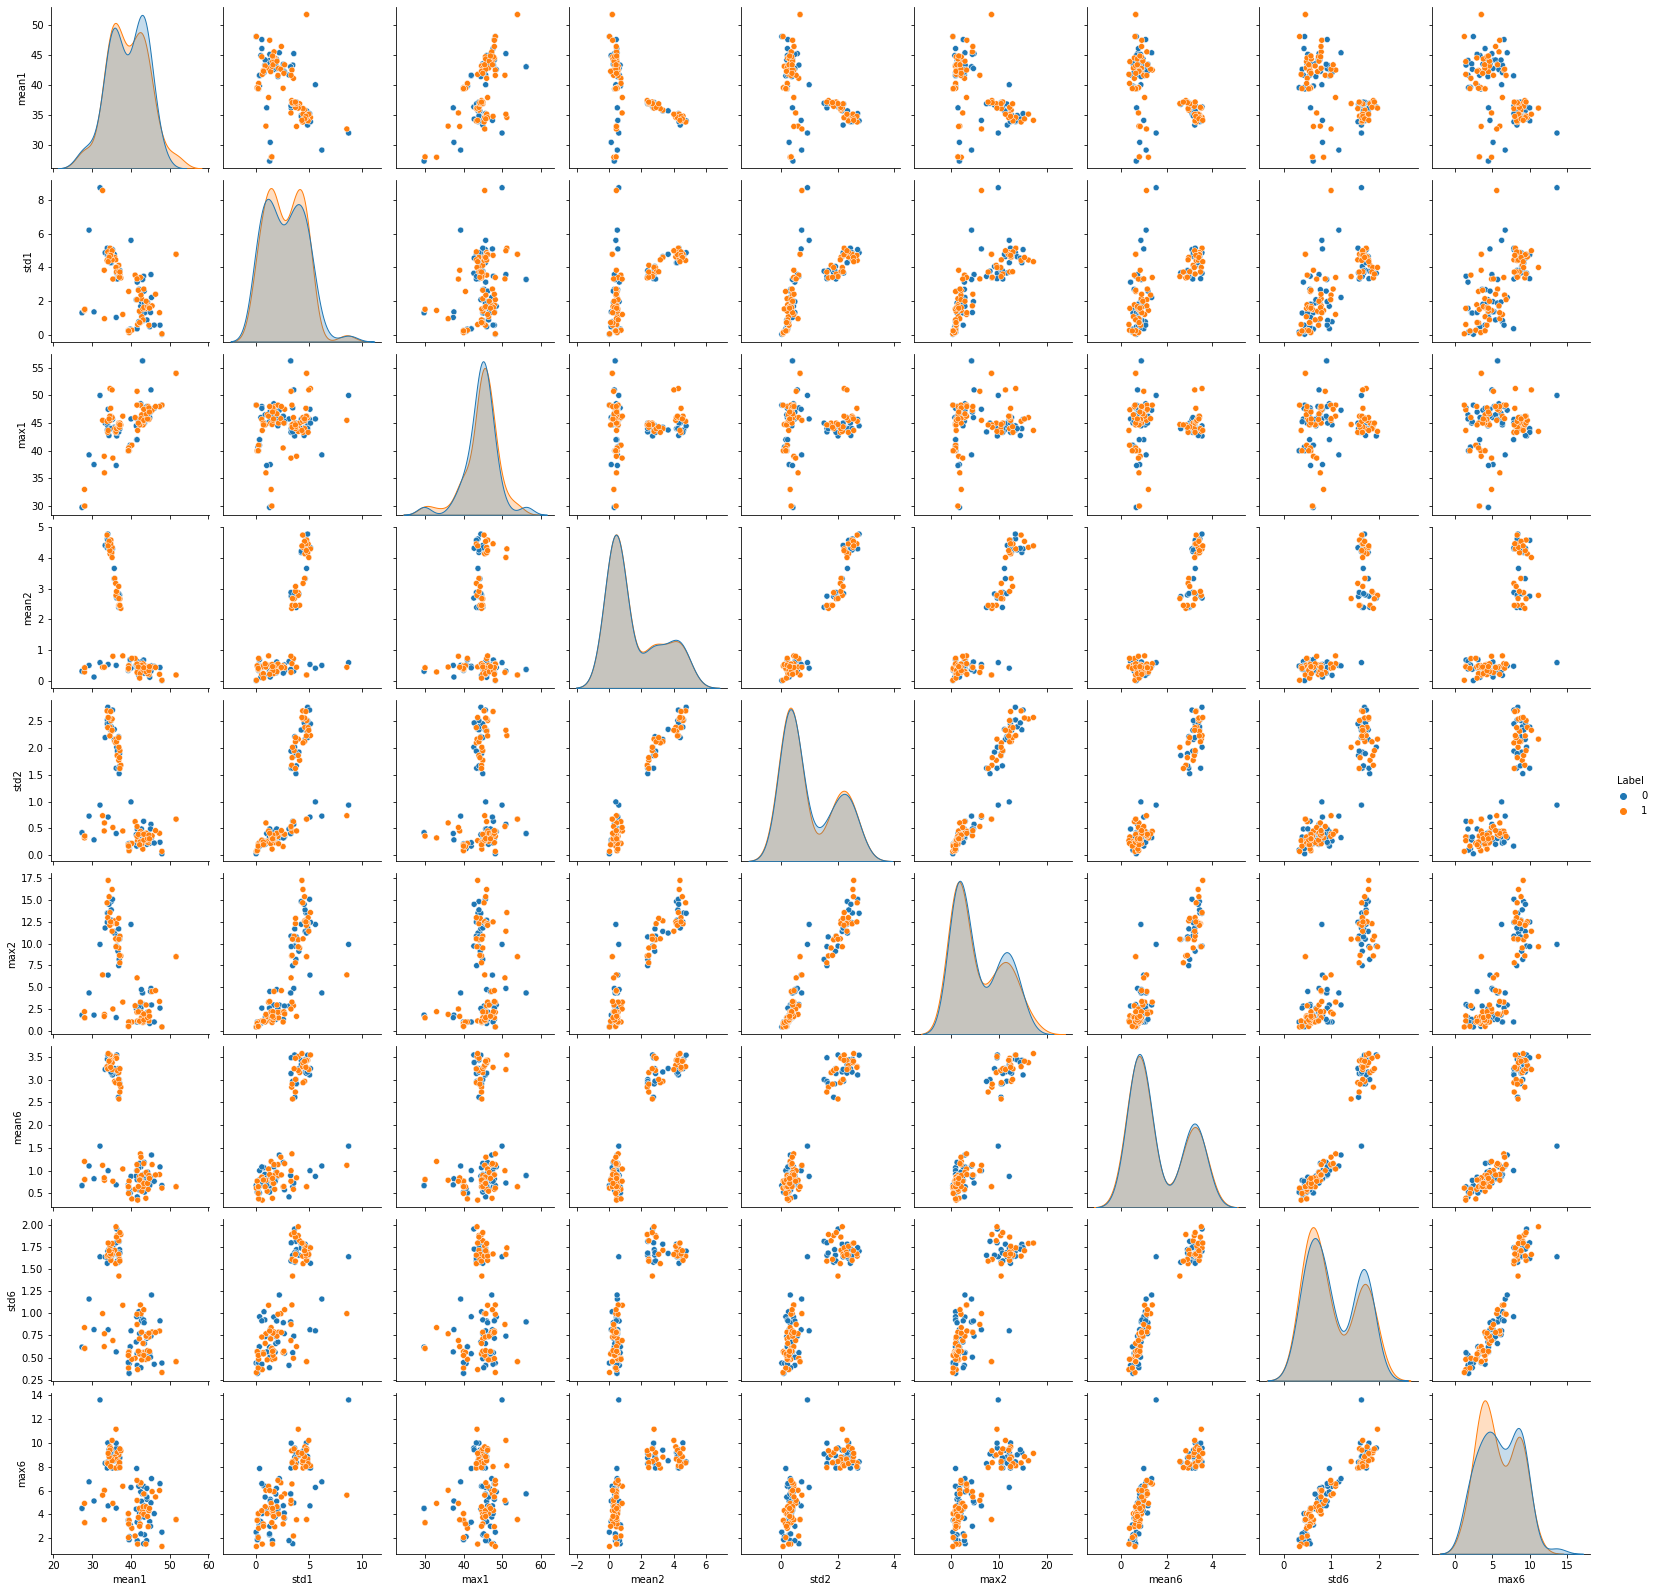

In [13]:
plot = sns.pairplot(total, hue = 'Label')

After comparing the scatterplots of 2.(a)i. and 2.(a)ii., it can be said that there is not a significant difference between both the plots.

2.(a)iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features.

In [14]:
def list_res(l, k):
    col_names = []
    final_col = []
    for i in range(1,(l*6)+1):
        col_names.append('min' + str(i))
        col_names.append('max' + str(i))
        final_col.append('max'+str(i))
        col_names.append('mean' + str(i))
        final_col.append('mean'+str(i))
        col_names.append('median' + str(i))
        col_names.append('std' + str(i))
        final_col.append('std'+str(i))
        col_names.append('1st quart' + str(i))
        col_names.append('3rd quart' + str(i))
    if k==0:
        return col_names
    if k==1:
        return final_col

In [15]:
# Reference: https://stackoverflow.com/questions/14822184/is-there-a-ceiling-equivalent-of-operator-in-python
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Reference: https://stackoverflow.com/questions/39358742/converting-list-of-lists-into-a-table
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
l_val = []
p_val = []
rank = []
final = []
for l in range(1,21):
    col = list_res(l,0)
    final_df = pd.DataFrame(columns = col)
    for file in train:
        data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
        data = data.drop(columns='time')
        inter = pd.DataFrame(columns = inter_col)
        start = 0
        batch = -(480 // -l) #Upside down floor division
        
        for i in range(l-1):
            temp = data.iloc[start:start+batch,]
            inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
            start = start + batch
        temp = data.iloc[start:,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        
        df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)
        
        name = os.path.split(file)[0]
        file_name = os.path.split(name)
        class_category = ['bending1','bending2']
        if(file_name[1] not in class_category):
            df['label'] = 0 
        else:
            df['label'] = 1
        
        final_df = final_df.append(df)
#     print(final_df) 

    final_df.fillna(0, inplace=True)
    attributes = list_res(l,1)
    x_train = final_df[attributes] #All the columns except label
    y_train = final_df.iloc[:,-1] #Label column is assigned to y_train

# Referring the psuedocode used in Homework4.pdf
    model = LogisticRegression()
    rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
    rfecv = rfecv.fit(x_train, y_train)
    final.append([l, sum(rfecv.support_) , max(rfecv.ranking_)])
    result = pd.DataFrame(final)
result.columns =['l', 'p', 'rank']
print(result)

     l   p  rank
0    1   5    14
1    2   6    31
2    3   4    51
3    4   7    66
4    5   8    83
5    6   5   104
6    7   3   124
7    8   3   142
8    9   4   159
9   10   2   179
10  11   3   196
11  12   2   215
12  13   2   233
13  14   4   249
14  15   6   265
15  16   5   284
16  17  15   292
17  18   3   322
18  19   1   342
19  20   2   359


KFold is a cross-validator that divides the dataset into k folds whereas StratifiedKFold ensures that each fold of dataset has the same proportion of observations with a given label. Therefore, we use StratisfiedKFold for the Logistic Regression.

The wrong way to perform cross validation is to do feature selection before cross validation. The right way is to include feature selection during cross validation. This will help reselect the features every time.

The ouput shows the corresponding rankings of 20 l-p pairs. The (l,p) pair (1,5) has the highest ranking.

2.(a)iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression as well as the p-values associated with them.

In [16]:
m1, m2, m3, m4, m5,m6 = [], [], [], [], [], [] 
m1_df, m2_df, m3_df, m4_df, m5_df, m6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
label = []
t = pd.DataFrame()
for files in (train):
    name = os.path.split(files)[0]
    file_name = os.path.split(name)
    class_category = ['bending1','bending2']
    if(file_name[1] not in class_category):
        label.append(0)
    else:
        label.append(1)
    final_df = pd.read_csv(files,skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    m1 = final_df['avg_rss12'].describe()
    m1 = m1.rename(index={'mean': 'mean1', 'std':'std1', 'max':'max1'})
    m1 = m1.drop(['count', 'min', '25%', '50%', '75%'])
    
    m2 = final_df['var_rss12'].describe()
    m2 = m2.rename(index={'mean': 'mean2', 'std':'std2', 'max':'max2'})
    m2 = m2.drop(['count', 'min', '25%', '50%', '75%'])
    
    m3 = final_df['avg_rss13'].describe()
    m3 = m3.rename(index={'mean': 'mean3', 'std':'std3', 'max':'max3'})
    m3 = m3.drop(['count', 'min', '25%', '50%', '75%'])
    
    m4 = final_df['var_rss13'].describe()
    m4 = m4.rename(index={'mean': 'mean4', 'std':'std4', 'max':'max4'})
    m4 = m4.drop(['count', 'min', '25%', '50%', '75%'])
    
    m5 = final_df['avg_rss23'].describe()
    m5 = m5.rename(index={'mean': 'mean5', 'std':'std5', 'max':'max5'})
    m5 = m5.drop(['count', 'min', '25%', '50%', '75%'])
    
    m6 = final_df['var_rss23'].describe()
    m6 = m6.rename(index={'mean': 'mean6', 'std':'std6', 'max':'max6'})
    m6 = m6.drop(['count', 'min', '25%', '50%', '75%'])
                          
    m1_df = m1_df.append(m1, ignore_index = True)
    m2_df = m2_df.append(m2, ignore_index = True)
    m3_df = m3_df.append(m3, ignore_index = True)
    m4_df = m4_df.append(m4, ignore_index = True)
    m5_df = m5_df.append(m5, ignore_index = True)
    m6_df = m6_df.append(m6, ignore_index = True)
    
label_df = pd.DataFrame()
label_df['Label'] = label
t = pd.concat([m1_df, m2_df, m3_df, m4_df, m5_df, m6_df, label_df], axis = 1)
t.fillna(0, inplace=True)
x_train = t.loc[:, t.columns != 'Label']
y_train = t.iloc[:,-1]

model = LogisticRegression()
rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv = rfecv.fit(x_train, y_train)
extracted_features = x_train.iloc[:, rfecv.support_]
print(extracted_features.columns)

Index(['mean1', 'mean3', 'mean5', 'max5', 'max6'], dtype='object')


In [17]:
score = rfecv.score(x_train, y_train)
print("Cross-validation accuracy of train data is:", score)

Cross-validation accuracy of train data is: 1.0


Confusion matrix for classifier on train data

True Positive rate is 1.0
True Negative rate is 1.0


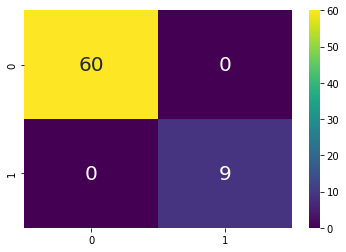

In [18]:
# Reference:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pred = rfecv.predict(x_train)
con_mat=confusion_matrix(y_train, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


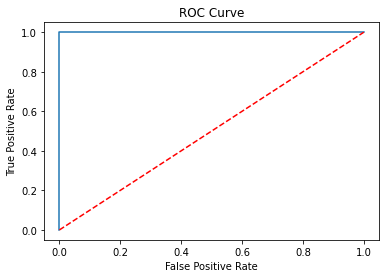

Area Under Curve: 1.0


In [19]:
# Reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

probs = rfecv.predict_proba(x_train)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))


In [20]:
import statsmodels.api as sm

model_stat = sm.Logit(y_train, extracted_features).fit(method='bfgs')
print(model_stat.summary())

Optimization terminated successfully.
         Current function value: 0.010046
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.9741
Time:                        15:57:03   Log-Likelihood:               -0.69316
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.347e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean1         -7.5388   4.16e+06  -1.8

2.(a)v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. 

In [21]:
m1, m2, m3, m4, m5,m6 = [], [], [], [], [], [] 
m1_df, m2_df, m3_df, m4_df, m5_df, m6_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
label = []
t = pd.DataFrame()
for files in (test):
    name = os.path.split(files)[0]
    file_name = os.path.split(name)
    class_category = ['bending1','bending2']
    if(file_name[1] not in class_category):
        label.append(0)
    else:
        label.append(1)
    final_df = pd.read_csv(files,skiprows=4,error_bad_lines=False, warn_bad_lines=False)
    m1 = final_df['avg_rss12'].describe()
    m1 = m1.rename(index={'mean': 'mean1', 'std':'std1', 'max':'max1'})
    m1 = m1.drop(['count', 'min', '25%', '50%', '75%'])
    
    m2 = final_df['var_rss12'].describe()
    m2 = m2.rename(index={'mean': 'mean2', 'std':'std2', 'max':'max2'})
    m2 = m2.drop(['count', 'min', '25%', '50%', '75%'])
    
    m3 = final_df['avg_rss13'].describe()
    m3 = m3.rename(index={'mean': 'mean3', 'std':'std3', 'max':'max3'})
    m3 = m3.drop(['count', 'min', '25%', '50%', '75%'])
    
    m4 = final_df['var_rss13'].describe()
    m4 = m4.rename(index={'mean': 'mean4', 'std':'std4', 'max':'max4'})
    m4 = m4.drop(['count', 'min', '25%', '50%', '75%'])
    
    m5 = final_df['avg_rss23'].describe()
    m5 = m5.rename(index={'mean': 'mean5', 'std':'std5', 'max':'max5'})
    m5 = m5.drop(['count', 'min', '25%', '50%', '75%'])
    
    m6 = final_df['var_rss23'].describe()
    m6 = m6.rename(index={'mean': 'mean6', 'std':'std6', 'max':'max6'})
    m6 = m6.drop(['count', 'min', '25%', '50%', '75%'])
                          
    m1_df = m1_df.append(m1, ignore_index = True)
    m2_df = m2_df.append(m2, ignore_index = True)
    m3_df = m3_df.append(m3, ignore_index = True)
    m4_df = m4_df.append(m4, ignore_index = True)
    m5_df = m5_df.append(m5, ignore_index = True)
    m6_df = m6_df.append(m6, ignore_index = True)
    
label_df = pd.DataFrame()
label_df['Label'] = label
t = pd.concat([m1_df, m2_df, m3_df, m4_df, m5_df, m6_df, label_df], axis = 1)
    
t.fillna(0, inplace=True)
x_test = t.loc[:, t.columns != 'Label']
y_test = t.iloc[:,-1]

model = LogisticRegression()
rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv = rfecv.fit(x_test, y_test)
extracted_features = x_test.iloc[:, rfecv.support_]
print(extracted_features.columns)

Index(['mean1', 'mean3', 'max3', 'mean5', 'max5', 'max6'], dtype='object')


In [22]:
score = rfecv.score(x_test, y_test)
print("Cross-validation accuracy of test data is:", score)

Cross-validation accuracy of test data is: 1.0


Confusion matrix for classifier on test data

True Positive rate is 1.0
True Negative rate is 1.0


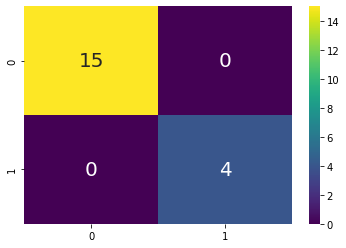

In [23]:
# Reference: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

pred = rfecv.predict(x_test)
con_mat=confusion_matrix(y_test, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

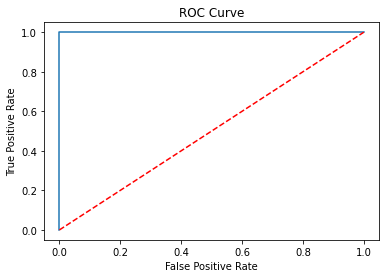

Area Under Curve: 1.0


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

probs = rfecv.predict_proba(x_test)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_test, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))

2.(a)v. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

The accuracy obtained on the test data is the same as the cross-validation accuracy obtained previously

2.(a)vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

It can be seen through the logit regression results that a fraction 0.99 of observations can be perfectly predicted. As a result, some parameters may not be identified. In such cases the model will be unstable.

2.(a)vii. Build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

It can be seen from the confusion matrix that the data is imbalanced. There is a significant difference between the data in the bending class and the data in the non-bending classes. As a result, SMOTE is used for upsampling the bending class.

True Positive rate is 1.0
True Negative rate is 1.0


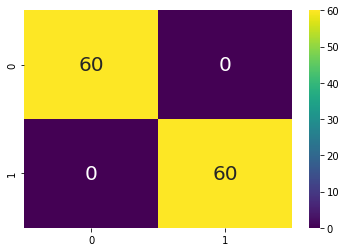

In [25]:
# Reference: https://www.kaggle.com/code/ghanender/logistic-regression-class-imbalance-smote
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
x_train_updated, y_train_updated = sm.fit_resample(x_train, y_train.ravel()) 
model = LogisticRegression() 
rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv = rfecv.fit(x_train_updated, y_train_updated.ravel())
extracted_features = x_train_updated.iloc[:, rfecv.support_]
# print(extracted_features)

# Confusion matrix
model = LogisticRegression(C=100)
model = model.fit(extracted_features, y_train_updated)
pred = model.predict(extracted_features)
con_mat = confusion_matrix(y_train_updated, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


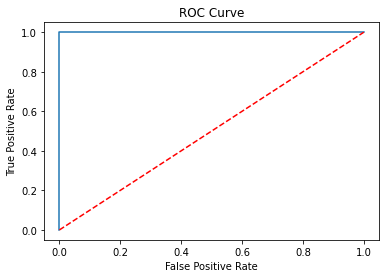

Area Under Curve: 1.0


In [26]:
# ROC, AUC curve
probs = model.predict_proba(extracted_features)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train_updated, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))

2.(b)i. Repeat 2(a)iii. using L1-penalized logistic regression, i.e. instead of using p-values for variable selection, use L1 regularization

In [27]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV.score

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
for l in range(1,21):
    col = list_res(l,0)
    final_df = pd.DataFrame(columns = col)
    for file in train:
        data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
        data = data.drop(columns='time')
        inter = pd.DataFrame(columns = inter_col)
        start = 0
        batch = -(480 // -l) #Upside down floor division
        
        for i in range(l-1):
            temp = data.iloc[start:start+batch,]
            inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
            start = start + batch
        temp = data.iloc[start:,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        
        df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)
        
        name = os.path.split(file)[0]
        file_name = os.path.split(name)
        class_category = ['bending1','bending2']
        if(file_name[1] not in class_category):
            df['label'] = 0 
        else:
            df['label'] = 1
        
        final_df = final_df.append(df)
#     print(final_df) 

    final_df.fillna(0, inplace=True)
    attributes = list_res(l,1)
    x_train = final_df[attributes] #All the columns except label
    y_train = final_df.iloc[:,-1] #Label column is assigned to y_train

    
    rfecv = LogisticRegressionCV(Cs=list(np.logspace(-1, 1)), cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, solver='liblinear')
    rfecv = rfecv.fit(x_train, y_train)
    final.append([l, rfecv.scores_[1].mean(axis=0).max()])
    result = pd.DataFrame(final)
result.columns =['l', 'max']
print(result)

     l       max
0    1  0.971429
1    2  0.957143
2    3  0.985714
3    4  0.971429
4    5  0.957143
5    6  0.942857
6    7  0.957143
7    8  0.957143
8    9  0.942857
9   10  0.942857
10  11  0.942857
11  12  0.942857
12  13  0.942857
13  14  0.942857
14  15  0.928571
15  16  0.942857
16  17  0.942857
17  18  0.942857
18  19  0.942857
19  20  0.942857


Highest accuracy 98.57 is at l=3

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
l=3
col = list_res(l,0)
final_df = pd.DataFrame(columns = col)
for file in train:
    data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
    data = data.drop(columns='time')
    inter = pd.DataFrame(columns = inter_col)
    start = 0
    batch = -(480 // -l) #Upside down floor division

    for i in range(l-1):
        temp = data.iloc[start:start+batch,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        start = start + batch
    temp = data.iloc[start:,]
    inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))

    df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)

    name = os.path.split(file)[0]
    file_name = os.path.split(name)
    class_category = ['bending1','bending2']
    if(file_name[1] not in class_category):
        df['label'] = 0 
    else:
        df['label'] = 1

    final_df = final_df.append(df)
#     print(final_df) 

final_df.fillna(0, inplace=True)
attributes = list_res(l,1)
x_train = final_df[attributes] #All the columns except label
y_train = final_df.iloc[:,-1] #Label column is assigned to y_train


rfecv = LogisticRegressionCV(Cs=list(np.logspace(-1, 1)), cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, solver='liblinear')
rfecv = rfecv.fit(x_train, y_train)

True Positive rate is 0.8888888888888888
True Negative rate is 1.0


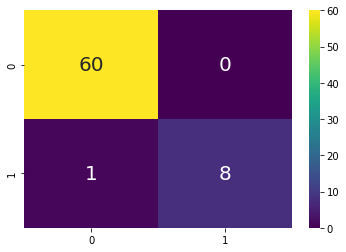

In [29]:
pred = rfecv.predict(x_train)
con_mat = confusion_matrix(y_train, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

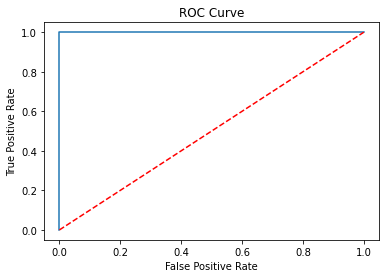

Area Under Curve: 1.0


In [30]:
probs = rfecv.predict_proba(x_train)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))

In [31]:
print("Accuracy of L1-penalized logistic regression is: ", rfecv.score(x_train, y_train) )

Accuracy of L1-penalized logistic regression is:  0.9855072463768116


(b)ii. Compare the L1-penalized with variable selection using p-values. 

Even though it was easier to implement the L-1 penalized method, it can be seen that variable selection using p-values gives higher accuracy and performs better that L-1 penalized method. 

(c)i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problemif possible.

In [48]:
# Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
for l in range(1,21):
    col = list_res(l,0)
    final_df = pd.DataFrame(columns = col)
    for file in train:
        data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
        data = data.drop(columns='time')
        inter = pd.DataFrame(columns = inter_col)
        start = 0
        batch = -(480 // -l) #Upside down floor division
        
        for i in range(l-1):
            temp = data.iloc[start:start+batch,]
            inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
            start = start + batch
        temp = data.iloc[start:,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        
        df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)
        
        name = os.path.split(file)[0]
        file_name = os.path.split(name)
        if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
        elif(file_name[1]=='cycling'):
            df['label'] = 2
        elif(file_name[1]=='lying'):
            df['label'] = 3
        elif(file_name[1]=='sitting'):
            df['label'] = 4
        elif(file_name[1]=='standing'):
            df['label'] = 5
        elif(file_name[1]=='walking'):
            df['label'] = 6
        
        final_df = final_df.append(df)
#     print(final_df) 

    final_df.fillna(0, inplace=True)
    attributes = list_res(l,1)
    x_train = final_df[attributes] #All the columns except label
    y_train = final_df.iloc[:,-1] #Label column is assigned to y_train

    model = LogisticRegressionCV(Cs=list(np.logspace(-1, 1)), cv=StratifiedKFold(5), penalty='l1', multi_class='multinomial', n_jobs=-1, solver='saga')
    model = model.fit(x_train, y_train)
    final.append([l, model.score(x_train, y_train)])
    result = pd.DataFrame(final)
result.columns =['l', 'score']
print(result)

     l     score
0    1  0.985507
1    2  1.000000
2    3  1.000000
3    4  1.000000
4    5  1.000000
5    6  1.000000
6    7  1.000000
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  0.971014
12  13  1.000000
13  14  0.971014
14  15  0.985507
15  16  1.000000
16  17  1.000000
17  18  1.000000
18  19  1.000000
19  20  1.000000


The accuracy obtained for train data is highest at l=2 valued 1.00

In [64]:
# Reference: https://stackoverflow.com/questions/48313387/valueerror-n-splits-10-cannot-be-greater-than-the-number-of-members-in-each-cla
inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
l=2
col = list_res(l,0)
final_df = pd.DataFrame(columns = col)
for file in test:
    data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
    data = data.drop(columns='time')
    inter = pd.DataFrame(columns = inter_col)
    start = 0
    batch = -(480 // -l) #Upside down floor division

    for i in range(l-1):
        temp = data.iloc[start:start+batch,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        start = start + batch
    temp = data.iloc[start:,]
    inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))

    df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)

    name = os.path.split(file)[0]
    file_name = os.path.split(name)
    if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
    elif(file_name[1]=='cycling'):
            df['label'] = 2
    elif(file_name[1]=='lying'):
            df['label'] = 3
    elif(file_name[1]=='sitting'):
            df['label'] = 4
    elif(file_name[1]=='standing'):
            df['label'] = 5
    elif(file_name[1]=='walking'):
            df['label'] = 6

    final_df = final_df.append(df)
#     print(final_df) 

final_df.fillna(0, inplace=True)
attributes = list_res(l,1)
x_test = final_df[attributes] #All the columns except label
y_test = final_df.iloc[:,-1] #Label column is assigned to y_train


model = LogisticRegressionCV(Cs=list(np.logspace(-1, 1)), cv=StratifiedKFold(4), penalty='l1', multi_class='multinomial', n_jobs=-1, solver='saga')
model = model.fit(x_test, y_test)
logistic_accuracy = model.score(x_test, y_test)
print("The accuracy obtained from test data is:", logistic_accuracy)
print("The testing error is:", 1-logistic_accuracy)

The accuracy obtained from test data is: 0.9473684210526315
The testing error is: 0.052631578947368474


True Positive rate is 1.0
True Negative rate is 1.0


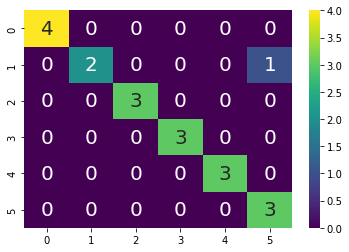

In [68]:
# Confusion matrix for test data
pred = model.predict(x_test)
con_mat = confusion_matrix(y_test, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

(c)ii. Repeat 2(c)i using a Naive Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results

In [74]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# Gaussian Naive Bayes' classifier
from sklearn.naive_bayes import GaussianNB

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
for l in range(1,21):
    col = list_res(l,0)
    final_df = pd.DataFrame(columns = col)
    for file in train:
        data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
        data = data.drop(columns='time')
        inter = pd.DataFrame(columns = inter_col)
        start = 0
        batch = -(480 // -l) #Upside down floor division
        
        for i in range(l-1):
            temp = data.iloc[start:start+batch,]
            inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
            start = start + batch
        temp = data.iloc[start:,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        
        df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)
        
        name = os.path.split(file)[0]
        file_name = os.path.split(name)
        if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
        elif(file_name[1]=='cycling'):
            df['label'] = 2
        elif(file_name[1]=='lying'):
            df['label'] = 3
        elif(file_name[1]=='sitting'):
            df['label'] = 4
        elif(file_name[1]=='standing'):
            df['label'] = 5
        elif(file_name[1]=='walking'):
            df['label'] = 6
        
        final_df = final_df.append(df)
#     print(final_df) 

    final_df.fillna(0, inplace=True)
    attributes = list_res(l,1)
    x_train = final_df[attributes] #All the columns except label
    y_train = final_df.iloc[:,-1] #Label column is assigned to y_train

    model = GaussianNB()
    model = model.fit(x_train, y_train)
    final.append([l, model.score(x_train, y_train)])
    result = pd.DataFrame(final)
result.columns =['l', 'score']
print(result)

     l     score
0    1  0.985507
1    2  0.985507
2    3  0.985507
3    4  0.985507
4    5  0.985507
5    6  0.971014
6    7  0.971014
7    8  0.971014
8    9  0.971014
9   10  0.971014
10  11  0.971014
11  12  0.971014
12  13  0.971014
13  14  0.985507
14  15  0.985507
15  16  0.985507
16  17  0.971014
17  18  0.971014
18  19  0.985507
19  20  0.985507


The accuracy obtained for train data is highest at l=1 valued 0.985507

In [80]:
inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
l=1
col = list_res(l,0)
final_df = pd.DataFrame(columns = col)
for file in test:
    data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
    data = data.drop(columns='time')
    inter = pd.DataFrame(columns = inter_col)
    start = 0
    batch = -(480 // -l) #Upside down floor division

    for i in range(l-1):
        temp = data.iloc[start:start+batch,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        start = start + batch
    temp = data.iloc[start:,]
    inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))

    df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)

    name = os.path.split(file)[0]
    file_name = os.path.split(name)
    if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
    elif(file_name[1]=='cycling'):
            df['label'] = 2
    elif(file_name[1]=='lying'):
            df['label'] = 3
    elif(file_name[1]=='sitting'):
            df['label'] = 4
    elif(file_name[1]=='standing'):
            df['label'] = 5
    elif(file_name[1]=='walking'):
            df['label'] = 6

    final_df = final_df.append(df)
#     print(final_df) 

final_df.fillna(0, inplace=True)
attributes = list_res(l,1)
x_test = final_df[attributes] #All the columns except label
y_test = final_df.iloc[:,-1] #Label column is assigned to y_train


model = GaussianNB()
model = model.fit(x_test, y_test)
gaussian_accuracy = model.score(x_test, y_test)
print("The accuracy obtained from test data is:", gaussian_accuracy)
print("The testing error is:", 1-gaussian_accuracy)

The accuracy obtained from test data is: 1.0
The testing error is: 0.0


True Positive rate is 1.0
True Negative rate is 1.0


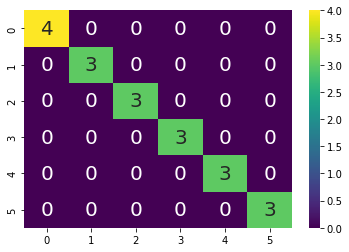

In [81]:
# Confusion matrix for test data
pred = model.predict(x_test)
con_mat = confusion_matrix(y_test, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


In [82]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

# Multinomial Naive Bayes' classifier
from sklearn.naive_bayes import MultinomialNB

inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
for l in range(1,21):
    col = list_res(l,0)
    final_df = pd.DataFrame(columns = col)
    for file in train:
        data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
        data = data.drop(columns='time')
        inter = pd.DataFrame(columns = inter_col)
        start = 0
        batch = -(480 // -l) #Upside down floor division
        
        for i in range(l-1):
            temp = data.iloc[start:start+batch,]
            inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
            start = start + batch
        temp = data.iloc[start:,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        
        df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)
        
        name = os.path.split(file)[0]
        file_name = os.path.split(name)
        if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
        elif(file_name[1]=='cycling'):
            df['label'] = 2
        elif(file_name[1]=='lying'):
            df['label'] = 3
        elif(file_name[1]=='sitting'):
            df['label'] = 4
        elif(file_name[1]=='standing'):
            df['label'] = 5
        elif(file_name[1]=='walking'):
            df['label'] = 6
        
        final_df = final_df.append(df)
#     print(final_df) 

    final_df.fillna(0, inplace=True)
    attributes = list_res(l,1)
    x_train = final_df[attributes] #All the columns except label
    y_train = final_df.iloc[:,-1] #Label column is assigned to y_train

    model = MultinomialNB()
    model = model.fit(x_train, y_train)
    final.append([l, model.score(x_train, y_train)])
    result = pd.DataFrame(final)
result.columns =['l', 'score']
print(result)

     l     score
0    1  0.884058
1    2  0.927536
2    3  0.913043
3    4  0.927536
4    5  0.913043
5    6  0.913043
6    7  0.913043
7    8  0.927536
8    9  0.927536
9   10  0.927536
10  11  0.956522
11  12  0.956522
12  13  0.956522
13  14  0.956522
14  15  0.956522
15  16  0.956522
16  17  0.956522
17  18  0.971014
18  19  0.956522
19  20  0.956522


The accuracy obtained for train data is highest at l=18 valued 0.971014

In [85]:
inter_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
final = []
l=18
col = list_res(l,0)
final_df = pd.DataFrame(columns = col)
for file in test:
    data = pd.read_csv(file, skiprows = 5, names = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"], error_bad_lines=False, warn_bad_lines=False)
    data = data.drop(columns='time')
    inter = pd.DataFrame(columns = inter_col)
    start = 0
    batch = -(480 // -l) #Upside down floor division

    for i in range(l-1):
        temp = data.iloc[start:start+batch,]
        inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))
        start = start + batch
    temp = data.iloc[start:,]
    inter = inter.append(temp.describe().T[inter_col].reset_index(drop=True))

    df = pd.DataFrame(inter.to_numpy().reshape(1,-1),columns = col)

    name = os.path.split(file)[0]
    file_name = os.path.split(name)
    if(file_name[1]=='bending1' or file_name[1]=='bending2'):
            df['label'] = 1 
    elif(file_name[1]=='cycling'):
            df['label'] = 2
    elif(file_name[1]=='lying'):
            df['label'] = 3
    elif(file_name[1]=='sitting'):
            df['label'] = 4
    elif(file_name[1]=='standing'):
            df['label'] = 5
    elif(file_name[1]=='walking'):
            df['label'] = 6

    final_df = final_df.append(df)
#     print(final_df) 

final_df.fillna(0, inplace=True)
attributes = list_res(l,1)
x_test = final_df[attributes] #All the columns except label
y_test = final_df.iloc[:,-1] #Label column is assigned to y_train


model = MultinomialNB()
model = model.fit(x_test, y_test)
multinomial_accuracy = model.score(x_test, y_test)
print("The accuracy obtained from test data is:", multinomial_accuracy)
print("The testing error is:", 1-multinomial_accuracy)

The accuracy obtained from test data is: 0.9473684210526315
The testing error is: 0.052631578947368474


True Positive rate is 1.0
True Negative rate is 1.0


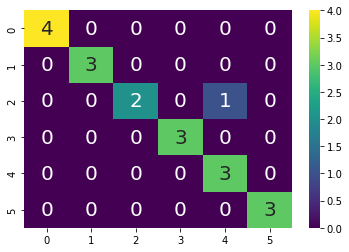

In [86]:
# Confusion matrix for test data
pred = model.predict(x_test)
con_mat = confusion_matrix(y_test, pred)
TN, FN, TP, FP = con_mat[0][0], con_mat[1][0], con_mat[1][1], con_mat[0][1]
print("True Positive rate is", TP/(TP + FN))
print("True Negative rate is", TN/(TN + FP))
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


Reference: https://stats.stackexchange.com/questions/2151/how-to-plot-roc-curves-in-multiclass-classification
For multi-class classification, we'll have to calculate the area under the curve for multiple binary classifications. It won't be possible to calculate the area under the curve as the right measure might be volume under the curve.

(c)iii. Which method is better for multi-class classification in this problem?

In [90]:
methods = ['Multinomial Regression Model', 'Gaussian Naive Bayes’ classifier', 'Multinomial Naive Bayes’ classifier']
scores = [logistic_accuracy, gaussian_accuracy, multinomial_accuracy]
data = {'Methods': methods, 'Accuracy': scores}
acc = pd.DataFrame(data)
print(acc)

                               Methods  Accuracy
0         Multinomial Regression Model  0.947368
1     Gaussian Naive Bayes’ classifier  1.000000
2  Multinomial Naive Bayes’ classifier  0.947368


As it can be seen from the above table, Gaussian Naive Bayes' is the best method

3. ISLR 4.8.3

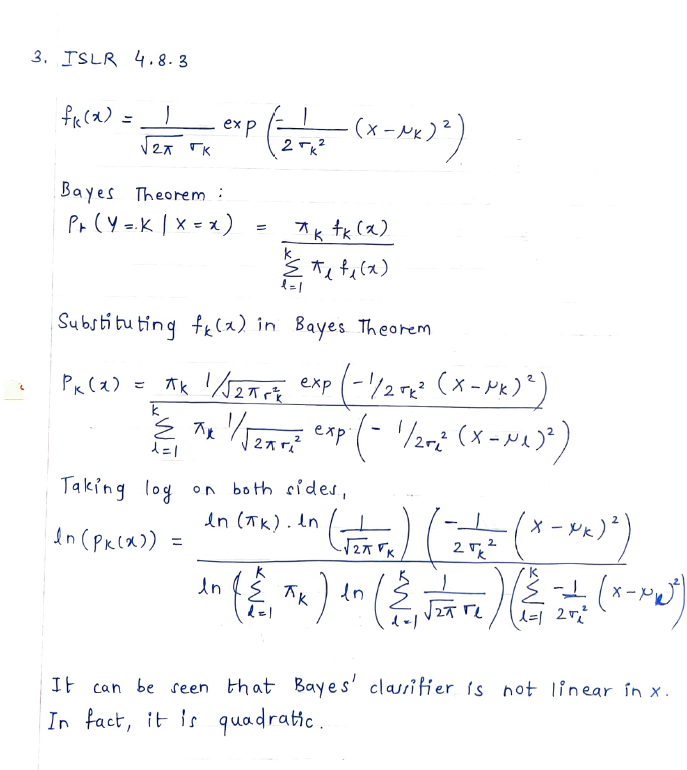

4. ISLR 4.8.7

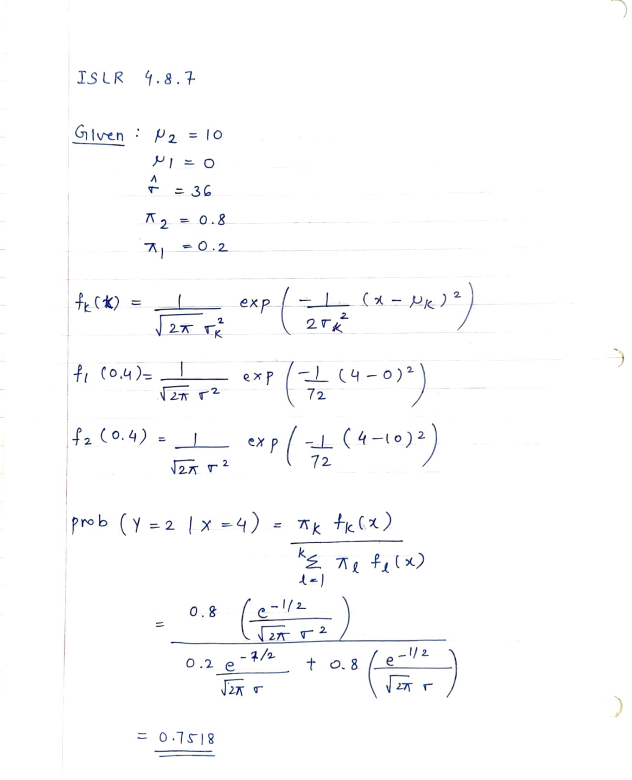